In [1]:
import numpy as np
import pandas as pd
# import sklearn as sns

## Collect data and perform EDA

In [2]:
data=pd.read_csv('../DataScience/Datasets/Salary_Data.csv')


In [3]:
data.shape

(30, 2)

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


## Split Data in training and testing

In [6]:
X=data[['YearsExperience']]
y=data['Salary']


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
# X_train

## Build Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
le=LinearRegression()

In [12]:
le.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [13]:
test_pred=le.predict(X_test)

In [14]:
# X_test

In [15]:
test_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [16]:
# data.loc[27]

## Check accuracy

In [17]:
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
r2_score(y_test,test_pred)

0.9414466227178214

In [19]:
mean_squared_error(y_test,test_pred)

37784662.46621314

In [20]:
np.sqrt(mean_squared_error(y_test,test_pred))

np.float64(6146.92300799458)

## Deploy Model

In [21]:
b0=le.intercept_
b1=le.coef_

In [22]:
b0

np.float64(25918.438334893202)

In [23]:
b1

array([9339.08172382])

In [24]:
# x=4.5
# y=b0+b1*x
# y
le.predict([[4.5]])

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([67944.30609206])

In [25]:
import matplotlib.pyplot as plt

In [26]:
train_pred=le.predict(X_train)

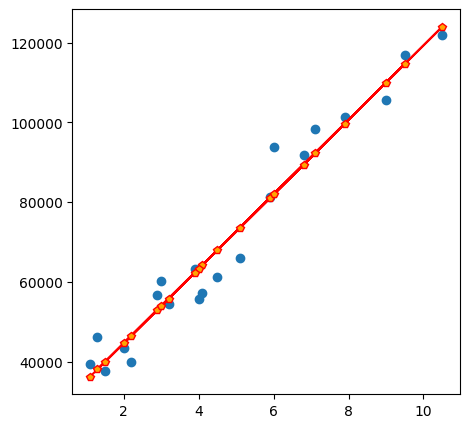

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train)
plt.plot(X_train,train_pred,color='red',marker='p',markerfacecolor='orange')
plt.show()

## Best fit line for testing

In [28]:
test_pred=le.predict(X_test)

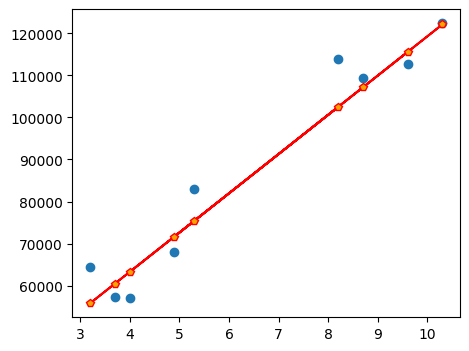

In [29]:
plt.figure(figsize=(5,4))
plt.scatter(X_test,y_test)
plt.plot(X_test,test_pred,color='red',marker='p',markerfacecolor='orange')
plt.show()

## K-fold validation

In [35]:
# from sklearn.model_selection import cross_validate
# from sklearn.neighbors import KNeighborsClassifier

In [36]:
# knn=KNeighborsClassifier()
# val_result=cross_validate(knn,X_train,y_train)
# val_result